In [10]:
import pandas as pd
data=pd.read_csv("carprice.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
#chequeo campos vacíos: la tabla está normalizada y limpia, al parecer...
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [16]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:>

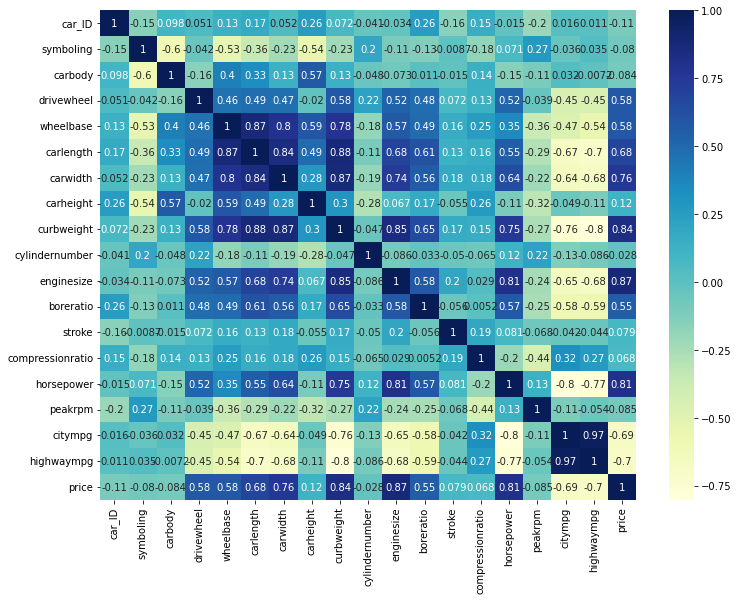

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
#heat map to take more relevant predictors for price
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True, )

In [30]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
#el labelfit enconder cambia valores muy reiterados por ints
data['drivewheel']=label.fit_transform(data['drivewheel'])
data['carbody']=label.fit_transform(data['carbody'])
data['cylindernumber']=label.fit_transform(data['cylindernumber'])

In [35]:
features = ["carbody","drivewheel","cylindernumber", "curbweight", "horsepower", "peakrpm", "citympg", "highwaympg"]
x=data[features]
y=data['price']

In [38]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y= train_test_split(x,y)

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor()

tree.fit(train_x, train_y)

DecisionTreeRegressor()

In [49]:
prediction=tree.predict(test_x)
prediction

array([19045. , 19699. , 17669. , 12964. ,  8358. , 13845. ,  9549. ,
       23875. , 12170. ,  7150.5,  7053. , 16558. , 15040. ,  6338. ,
       23875. , 23875. ,  9279. , 15580. , 35550. ,  9298. ,  8358. ,
       16845. ,  7995. ,  7463. ,  8013. , 19699. , 11900. , 19045. ,
       11395. ,  7126. ,  8495. ,  7995. , 18420. , 33278. ,  7995. ,
       15690. ,  7895. , 28176. ,  8449. ,  5572. , 15250. ,  6488. ,
        8189. , 14869. , 12764. , 11259. ,  6529. , 17710. ,  6338. ,
        8778. ,  9549. , 16500. ])

In [52]:
tree.predict(x[:5])


array([16500., 16500., 16500., 13950.,  8778.])

In [51]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,0,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,0,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,2,2,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,3,1,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,3,0,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [53]:

tree.score(test_x,prediction)

1.0

<AxesSubplot:xlabel='price'>

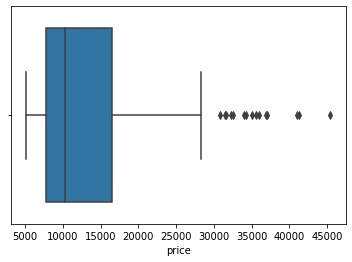

In [91]:

sns.boxplot(x='price',data=data)

C:\Users\urkni\AppData\Local\Temp\ipykernel_8444\3841574132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['price']=y


<AxesSubplot:>

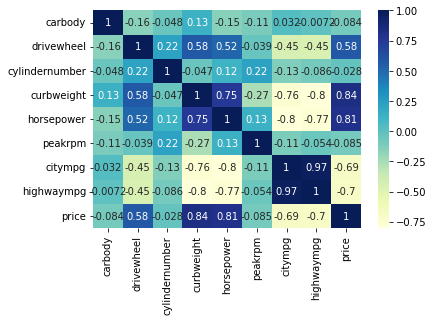

In [80]:
x['price']=y
sns.heatmap(x.corr(),cmap="YlGnBu",annot=True)
